# Relatório de Análise VIII

## Identificando e removendo outliers

In [4]:
import pandas as pd

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 10))

In [6]:
dados = pd.read_csv('dados/aluguel_residencial3.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apto
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apto
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apto
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apto


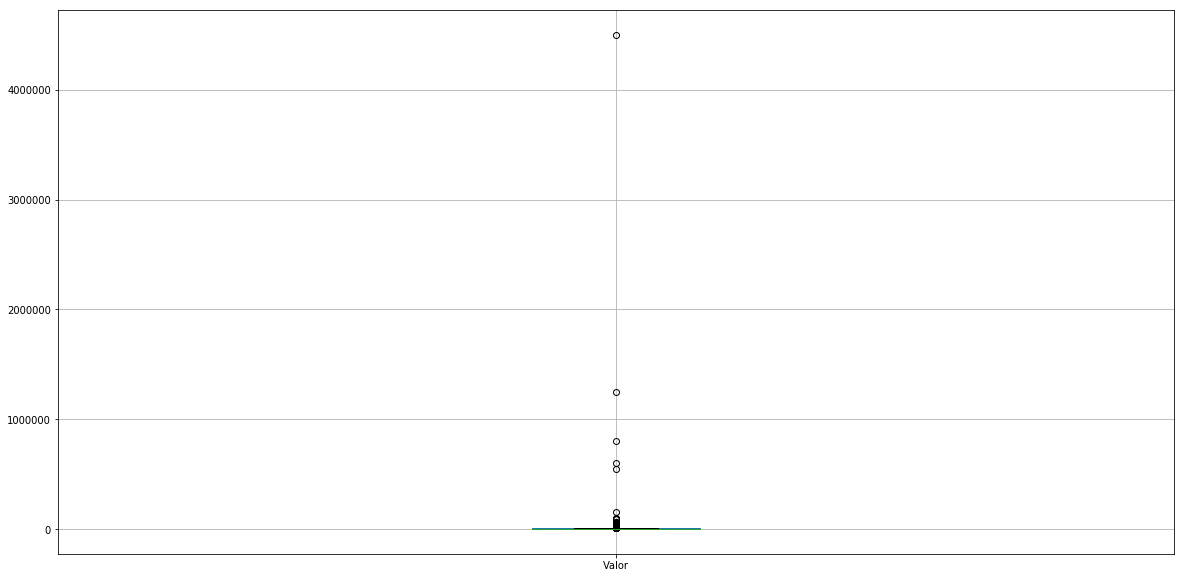

In [7]:
dados.boxplot(['Valor'])

In [8]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apto
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apto
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apto
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apto


In [9]:
valor = dados['Valor']

<img src="compressed_box-plot.png" width=70%>

In [10]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
lim_inf = Q1 - 1.5 * IIQ
lim_sup = Q3 + 1.5 * IIQ

In [11]:
selecao = (valor >= lim_inf) & (valor <= lim_sup)
dados_new = dados[selecao]

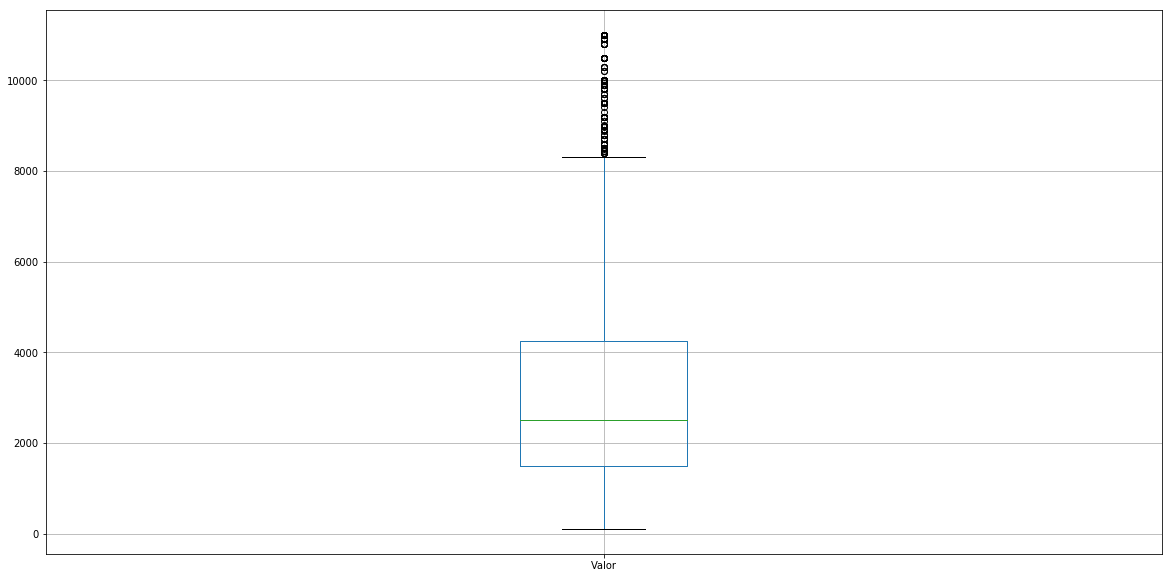

In [12]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa89309ac>]],
      dtype=object)

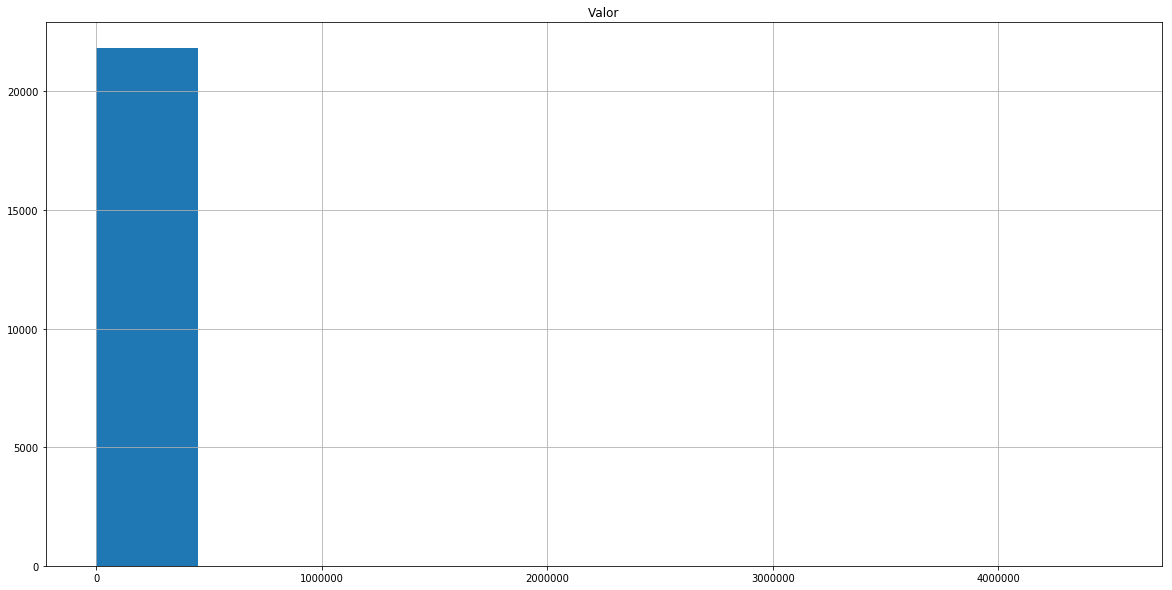

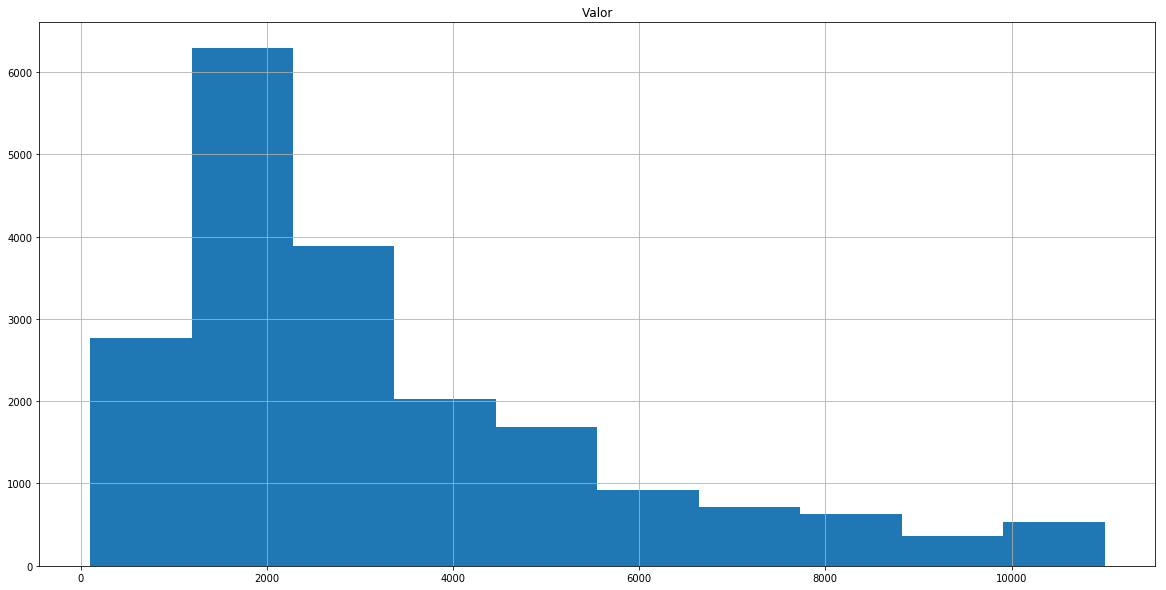

In [13]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

### Exercício

In [14]:
dadosa = pd.read_csv('dados/aluguel_amostra.csv.bz2', sep=';')
dadosa.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento


In [15]:
valor = dadosa['Valor m2']

In [16]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
lim_inf = Q1 - 1.5 * IIQ
lim_sup = Q3 + 1.5 * IIQ

In [17]:
print('[Q1] → %.2f\n[Q3] → %.2f\n[IIQ] → %.2f\n[Q1 - 1.5 * IIQ] → %.2f\n[Q3 + 1.5 * IIQ] → %.2f' % (
      Q1, Q3, IIQ, lim_inf, lim_sup))

[Q1] → 21.25
[Q3] → 42.31
[IIQ] → 21.06
[Q1 - 1.5 * IIQ] → -10.34
[Q3 + 1.5 * IIQ] → 73.90


## Identificando e removendo outliers II

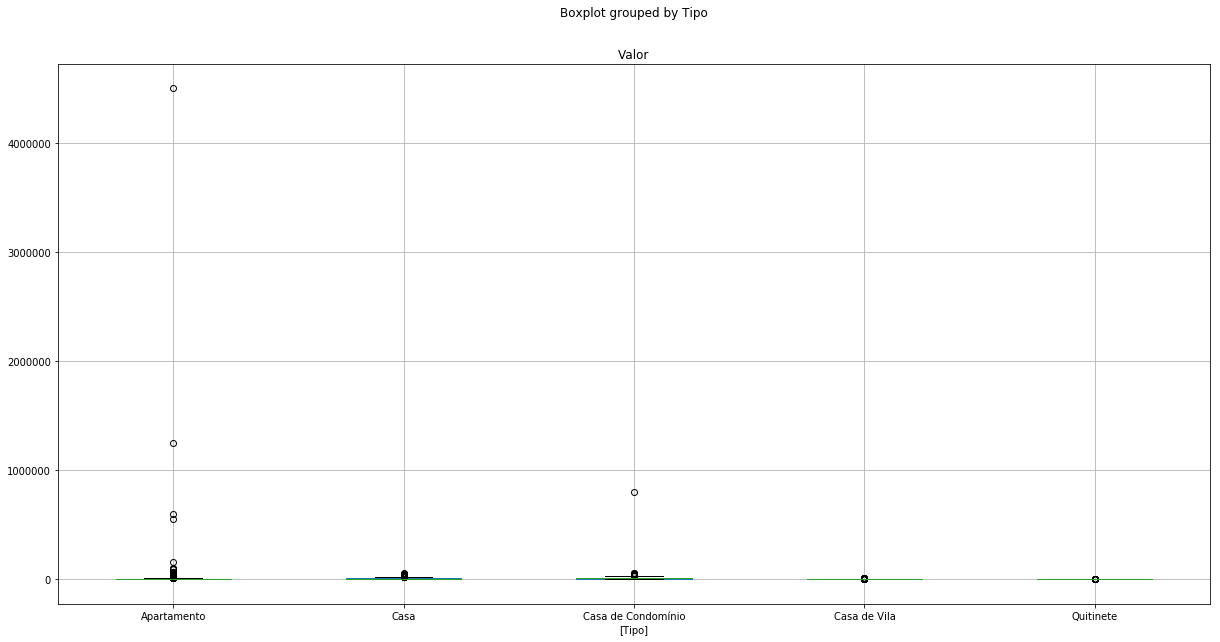

In [18]:
dados.boxplot(['Valor'], by=['Tipo'])

In [21]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [22]:
type(grupo_tipo)

pandas.core.groupby.groupby.SeriesGroupBy

In [23]:
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     7,     8,     9,    11,    13,    14,
                15,
             ...
             21813, 21814, 21816, 21817, 21818, 21819, 21821, 21823, 21824,
             21825],
            dtype='int64', length=18780),
 'Casa': Int64Index([    1,    22,    54,    57,    96,   100,   144,   160,   180,
               238,
             ...
             21582, 21606, 21614, 21667, 21672, 21699, 21756, 21781, 21793,
             21804],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    5,     6,    12,    16,    42,    58,   166,   168,   183,
               207,
             ...
             21709, 21711, 21719, 21752, 21763, 21764, 21782, 21791, 21801,
             21820],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   81,   212,   220,   303,   332,   697,   822,   844,   918,
              1012,
             ...
             21184, 21189, 21253, 21325, 21353, 21366, 21588, 21635, 21716

In [24]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
lim_inf = Q1 - 1.5 * IIQ
lim_sup = Q3 + 1.5 * IIQ

In [25]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [26]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [27]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [28]:
lim_inf

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [29]:
lim_sup

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [30]:
lim_sup['Apartamento']

9950.0

In [31]:
lim_sup['Casa']

22850.0

In [33]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    print(tipo)
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= lim_inf[tipo]) & (dados['Valor'] <= lim_sup[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


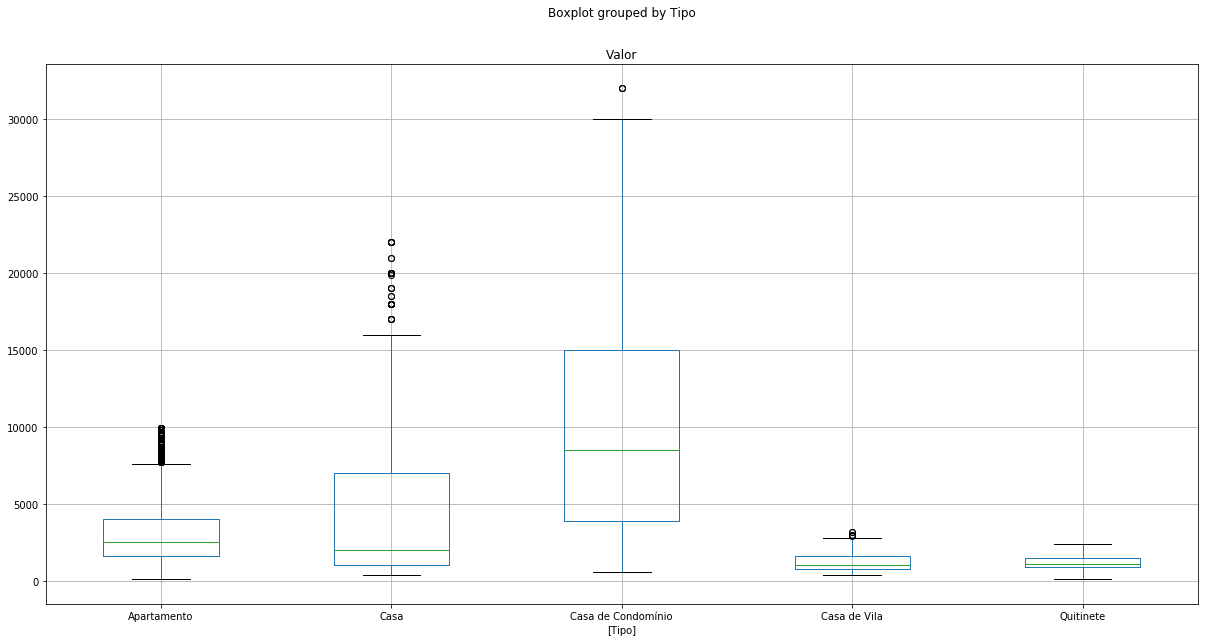

In [34]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [35]:
dados_new.to_csv('dados/aluguel_residencial4.csv', sep=';', index=False)

In [36]:
dados = pd.read_csv('dados/aluguel_residencial4.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apto
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apto
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apto
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apto
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apto


In [37]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19831 entries, 0 to 19830
Data columns (total 11 columns):
Tipo             19831 non-null object
Bairro           19831 non-null object
Quartos          19831 non-null int64
Vagas            19831 non-null int64
Suites           19831 non-null int64
Area             19831 non-null int64
Valor            19831 non-null float64
Condominio       19831 non-null float64
IPTU             19831 non-null float64
Valor m2         19831 non-null float64
Tipo Agregado    19831 non-null object
dtypes: float64(4), int64(4), object(3)
memory usage: 1.4+ MB


In [38]:
dados.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2
count,19831.000000,19831.000000,19831.000000,19831.000000,19831.000000,1.983100e+04,19831.000000,19831.000000
mean,2.409712,1.200797,0.819575,120.265393,3465.402299,1.386190e+03,433.981241,31.114005
std,1.031674,13.957338,1.026979,126.603826,3291.356043,4.669223e+04,3698.116785,15.071508
min,0.000000,0.000000,0.000000,10.000000,100.000000,0.000000e+00,0.000000,2.780000
25%,2.000000,0.000000,0.000000,62.000000,1500.000000,5.000000e+02,0.000000,20.120000
50%,2.000000,1.000000,1.000000,85.000000,2500.000000,8.000000e+02,100.000000,28.160000
75%,3.000000,2.000000,1.000000,130.000000,4300.000000,1.336000e+03,294.000000,39.000000
max,14.000000,1960.000000,14.000000,3000.000000,32000.000000,6.552570e+06,450625.000000,471.800000
